In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Data/bids.csv')

In [3]:
data.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [4]:
def categorising(data, column1, column2, column3):

    data[column1] = data[column1].astype('category')
    data[column2] = data[column2].astype('category')
    data[column3] = data[column3].astype('category')
    cat_columns = data.select_dtypes(['category']).columns
    data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
    
def mergedata(data, bidder):
    mer_bidder = data.merge(bidder, left_on = 'bidder_id', right_on = 'bidder_id', how = 'left')
    return mer_bidder[mer_bidder.payment_account.notnull()]

def scatter_plot(auctions, data, ncol, nrow):
    fig, axs = plt.subplots(ncols = ncol, nrows = nrow, figsize = (12, 15), sharex =True, sharey=True)
    i = 0
    for auction in auctions.index:
        df = data[data['auction'] == auction]
        sns.regplot(x = 'bid_id', y = 'time', data = df, ax = axs[i], fit_reg=False)
        axs[i].set_title('auction: {}'.format(auction))
        i += 1
    fig.tight_layout()

In [5]:
#categorising(data, 'device', 'merchandise', 'country')

In [6]:
bidder_train = pd.read_csv('Data/train.csv')
train_bid = mergedata(data, bidder_train)

In [7]:
train_bid.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3,2c198811bf76f74512e24f5a537e21f9o3kyh,4e408da3d4dc783220f7d7c6a2f6bb62fxl68,0.0
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c22817wsw,a3d2de7675556553a5f08e4c88d2c228qg5i2,0.0
10,10,a58ace8b671a7531c88814bc86b2a34cf0crb,z6j8b,sporting goods,phone10,9759243210526315,ng,209.80.85.101,adgjz71s3p2oiau,a3d2de7675556553a5f08e4c88d2c22817wsw,a3d2de7675556553a5f08e4c88d2c228qg5i2,0.0
13,13,7e34a26c4c339e875997f4b9239d2b5fscng4,nbx39,mobile,phone13,9759243263157894,in,143.183.225.33,e5i17pk9wygxewv,d1154cf7f47d7be0579cf24f6df1edcaagi99,fe7698870c64030109477f0d692741bfb3jn2,0.0


In [8]:
#train_bid['bidder_id'] = train_bid['bidder_id'].astype('category')
#train_bid['bidder_id'] = train_bid['bidder_id'].cat.codes

#train_bid['auction'] = train_bid['auction'].astype('category')
#train_bid['auction'] = train_bid['auction'].cat.codes

In [9]:
exp_data = train_bid[(train_bid.merchandise == 'mobile') & (train_bid.outcome == 1)]
trying = exp_data[exp_data.bidder_id == 'fae553f133602fba6e9e6051dfb27fefkruax']
bids = trying.groupby('auction').count().sort('bid_id').tail(6)

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


				    bidder ID: fae553f133602fba6e9e6051dfb27fefkruax


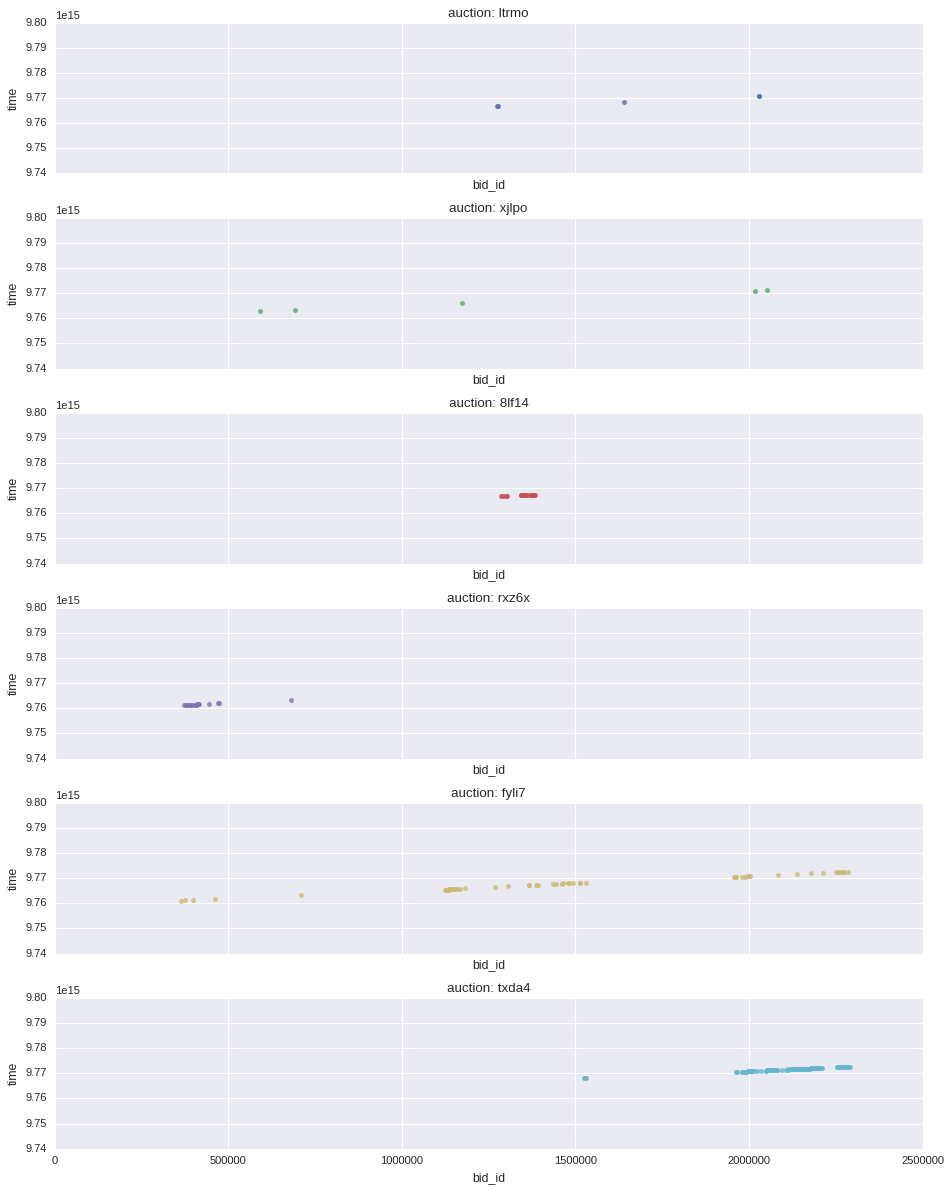

In [10]:
scatter_plot(bids, trying, 1, 6)
print("\t\t\t\t    bidder ID: fae553f133602fba6e9e6051dfb27fefkruax")

In [11]:
human_data = train_bid[(train_bid.merchandise == 'mobile') & (train_bid.outcome == 0)]
human = human_data[human_data.bidder_id == 'ffc4e2dd2cc08249f299cab46ecbfacfobmr3']
bids_human = human.groupby('auction').count().sort('bid_id').tail(6)

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


				    bidder ID: ffc4e2dd2cc08249f299cab46ecbfacfobmr3


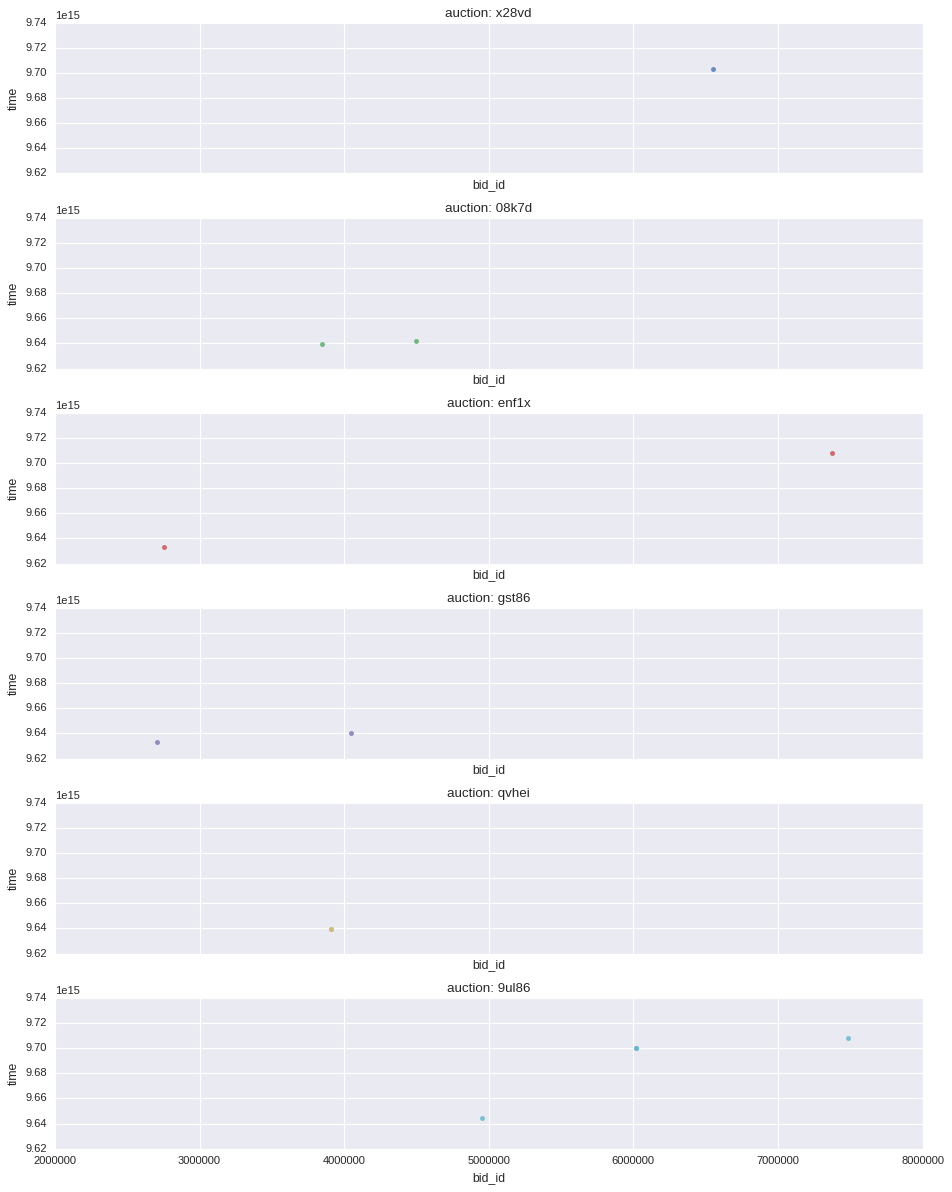

In [12]:
scatter_plot(bids_human, human, 1, 6)
print("\t\t\t\t    bidder ID: ffc4e2dd2cc08249f299cab46ecbfacfobmr3")

## Proportion

In [53]:
bot_bidder = train_bid[train_bid.outcome == 1]
print("Robot bidders: {0:.5g}%".format(len(bot_bidder)*100/len(train_bid)))

Robot bidders: 13.428%


In [54]:
human_bidder = train_bid[train_bid.outcome == 0]
print("Human bidders: {0:.5g}%".format(len(human_bidder)*100/len(train_bid)))

Human bidders: 86.572%


##### It seems there are not too many bots bidders. But if we think about it in another way:

In [118]:
a = train_bid[train_bid.outcome == 1][['auction']]
b = train_bid[train_bid.outcome == 0][['auction']]
total = train_bid.auction.nunique()
robots = a.auction.nunique()
human_auction = b.auction.nunique()

In [119]:
print("The proportion of auctions that bots bidders participated: ", robots/total)

The proportion of auctions that bots bidders participated:  0.5015698587127159


## Difference between Human and Bots bidders

In [15]:
train_bid.merchandise.unique()

array(['furniture', 'mobile', 'sporting goods', 'home goods', 'jewelry',
       'office equipment', 'computers', 'books and music', 'auto parts',
       'clothing'], dtype=object)

In [16]:
train_bid.replace(['furniture', 'mobile', 'sporting goods', 'home goods', 'jewelry',
       'office equipment', 'computers', 'books and music', 'auto parts',
       'clothing'], [0,1,2,3,4,5,6,7,8,9], inplace = True)

#### Which merchandise are more likely to be classified as bots bidders?

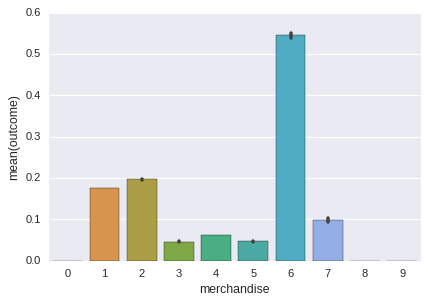

In [55]:
_ = sns.barplot(data=train_bid, x='merchandise', y='outcome')

### How many bids per a bidder made per auction? ---- classified as 'bots'

In [21]:
bots_num_auction = pd.DataFrame(train_bid[train_bid['outcome'] == 1][['bidder_id','auction']]\
                       .groupby(['bidder_id']).auction.nunique())

In [22]:
bots_num_bids = train_bid[train_bid['outcome'] == 1][['bidder_id', 'bid_id']].groupby('bidder_id').count()

In [23]:
bots_avg = pd.DataFrame(bots_num_bids.bid_id/bots_num_auction.auction)
bots_avg = bots_avg.rename(columns = {0:'average bids per auction'})

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


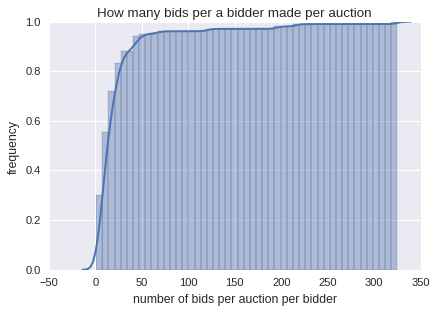

In [61]:
_ = sns.distplot(bots_avg['average bids per auction'],
                 hist_kws=dict(cumulative=True),
                 kde_kws=dict(cumulative=True))
_ = plt.ylabel('frequency')
_ = plt.xlabel('number of bids per auction per bidder')
#_ = plt.title('How many bids per a bidder made per auction')

### How many bids per a bidder made per auction? ---- classified as 'human'

In [120]:
human_num_auction = pd.DataFrame(train_bid[train_bid['outcome'] == 0][['bidder_id','auction']]\
                       .groupby(['bidder_id']).auction.nunique())

In [121]:
human_num_bids = train_bid[train_bid['outcome'] == 0][['bidder_id', 'bid_id']].groupby('bidder_id').count()

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


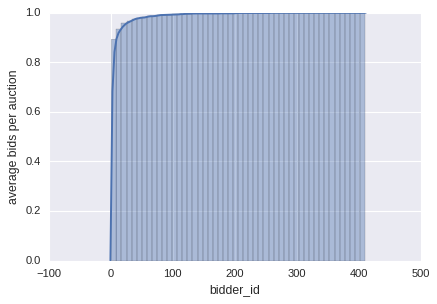

In [122]:
human_avg = pd.DataFrame(human_num_bids.bid_id/human_num_auction.auction)
human_avg = human_avg.rename(columns = {0:'average bids per auction'})
#_ = human_avg.drop('916d2d806b772c9f227a9b3640e31469ljrxo').reset_index().drop('bidder_id', axis=1).plot()
_ = sns.distplot(human_avg.drop('916d2d806b772c9f227a9b3640e31469ljrxo')['average bids per auction'],
                 hist_kws=dict(cumulative=True),
                 kde_kws=dict(cumulative=True))
_ = plt.xlabel('bidder_id')
_ = plt.ylabel('average bids per auction')

### 'Outliers' may not make sence in this senario

In [31]:
nowtry = pd.DataFrame(bots_num_bids.bid_id/bots_num_auction.auction)

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


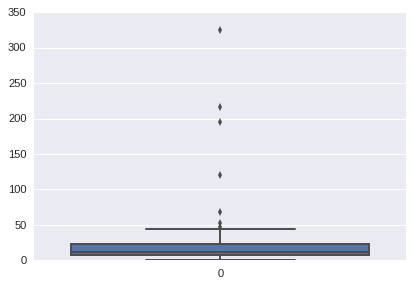

In [32]:
sns.boxplot(nowtry)

In [33]:
nowtry = pd.DataFrame(human_num_bids.bid_id/human_num_auction.auction).drop('916d2d806b772c9f227a9b3640e31469ljrxo')

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


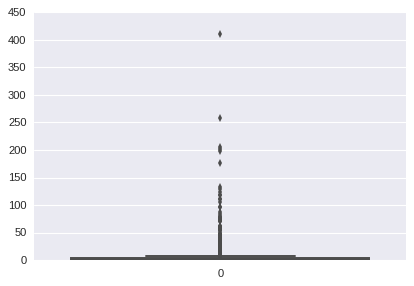

In [34]:
sns.boxplot(nowtry)

### Number of human/bots bidders for each country

In [123]:
countries = pd.DataFrame(train_bid.groupby('outcome').country.value_counts()).\
            rename(columns={'country':'number_of_bidders'}).reset_index()

In [124]:
countries_bots = countries[countries.outcome == 1]
countries_human = countries[countries.outcome == 0]

In [126]:
merged = countries_human.merge(countries_bots, left_on = 'country', right_on = 'country', how = 'left')

In [128]:
merged['proportion'] = merged.number_of_bidders_y/(merged.number_of_bidders_y + merged.number_of_bidders_x)

In [129]:
merged_countries = merged.sort('proportion').dropna()

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [130]:
merged_countries = merged_countries[(merged_countries['number_of_bidders_x']+merged_countries['number_of_bidders_y'])>= 500]

In [131]:
merged_countries.tail(10)

,outcome_x,country,number_of_bidders_x,outcome_y,number_of_bidders_y,proportion
70,0.0,se,2790,1.0,2479.0,0.470488
77,0.0,il,2397,1.0,2138.0,0.471444
9,0.0,us,73380,1.0,66663.0,0.476018
99,0.0,tw,1329,1.0,1285.0,0.491584
43,0.0,au,7756,1.0,8634.0,0.526785
42,0.0,ca,7804,1.0,9205.0,0.541184
76,0.0,at,2445,1.0,3407.0,0.582194
35,0.0,de,10436,1.0,18530.0,0.639716
116,0.0,kr,634,1.0,6340.0,0.909091
125,0.0,jp,498,1.0,7921.0,0.940848


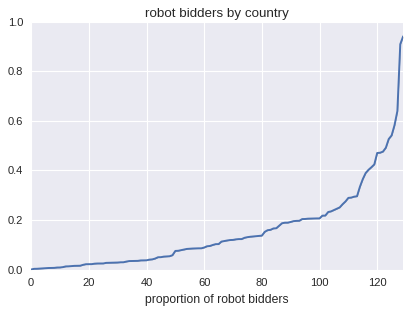

In [134]:
_ = sns.tsplot(data = merged_countries.proportion)
_ = plt.xlabel('proportion of robot bidders')
_ = plt.title('robot bidders by country')

### Number of human/bots bidders for different devices

In [135]:
devices = pd.DataFrame(train_bid.groupby('outcome').device.value_counts()).\
            rename(columns={'device':'number_of_bidders'}).reset_index()

In [136]:
devices_bots = devices[devices.outcome == 1]
devices_human = devices[devices.outcome == 0]

In [137]:
merged = devices_human.merge(devices_bots, left_on = 'device', right_on = 'device', how = 'left')

In [138]:
merged['proportion'] = merged.number_of_bidders_y/(merged.number_of_bidders_x + merged.number_of_bidders_y)

In [139]:
merged_sort = merged.sort('proportion').dropna()

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [140]:
merged_sort = merged_sort[(merged_sort['number_of_bidders_x']+merged_sort['number_of_bidders_y'])>= 500]

In [141]:
merged_sort = merged_sort.set_index('device')

In [146]:
merged_sort.tail(10)

,outcome_x,number_of_bidders_x,outcome_y,number_of_bidders_y,proportion
device,,,,,
phone466,0.0,209,1.0,2334.0,0.917814
phone491,0.0,49,1.0,560.0,0.919540
phone322,0.0,99,1.0,1189.0,0.923137
phone488,0.0,83,1.0,997.0,0.923148
phone902,0.0,73,1.0,1058.0,0.935455
phone398,0.0,44,1.0,681.0,0.939310
phone559,0.0,43,1.0,712.0,0.943046
phone796,0.0,82,1.0,1516.0,0.948686
phone2287,0.0,29,1.0,933.0,0.969854


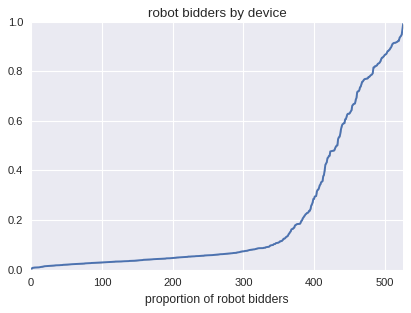

In [145]:
_ = sns.tsplot(data = merged_sort.proportion)
_ = plt.xlabel('proportion of robot bidders')
_ = plt.title('robot bidders by device')